#Fire up GraphLab Create

In [1]:
import graphlab

#Load some house sales data

In [2]:
sales = graphlab.SFrame("home_data.gl/")

[INFO] This non-commercial license of GraphLab Create is assigned to forihcs@gmail.comand will expire on September 21, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-27320 - Server binary: /Users/oleksiirenov/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1443648383.log
[INFO] GraphLab Server Version: 1.6.1


In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


#Exploring the data for housing

In [4]:
#graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

Canvas is accessible via web browser at the URL: http://localhost:64777/index.html
Opening Canvas in default web browser.


#Fit simple regression model of sqft of living to price

In [5]:
train_data, test_data = sales.random_split(.8, seed = 0)

#Build the regression model

In [6]:
sqft_model = graphlab.linear_regression.create(train_data,target = 'price', features = ['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16565
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 1.013936     | 4304519.844779     | 4381723.

# Evaluate simple model

In [7]:
print test_data['price'].mean()

543054.042563


In [8]:
print(sqft_model.evaluate(test_data))

{'max_error': 4168832.999095907, 'rmse': 255139.37088573189}


#Let's show what our predictions look like

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

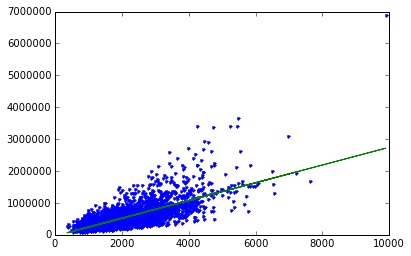

In [10]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
         test_data['sqft_living'], sqft_model.predict(test_data),'-')

In [11]:
sqft_model.get('coefficients')

name,index,value
(intercept),None,-40713.6403925
sqft_living,None,278.754362113


#Exlore other features in the data

In [12]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [13]:
sales[my_features].show()

Canvas is updated and available in a tab in the default browser.


In [14]:
sales.show(view='BoxWhisker Plot', x='zipcode', y = 'price')

Canvas is updated and available in a tab in the default browser.


#Build regression model with more features

In [15]:
my_features_model = graphlab.linear_regression.create(train_data, target = 'price', features = my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16487
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 115
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.043725     | 3777524.618010     | 539019

In [16]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [17]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4168832.999095907, 'rmse': 255139.37088573189}
{'max_error': 3498830.0323314583, 'rmse': 180152.65940380606}


#Apply learned models to predict prices of 3 houses

In [18]:
house1 = sales[sales['id'] == '5309101200']

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

In [20]:
print house1['price']

[620000, ... ]


In [21]:
print sqft_model.predict(house1)

[628296.8286784937]


In [22]:
print my_features_model.predict(house1)

[717969.4210058665]


#Prediction for a second house, fancier house

In [23]:
house2 = sales[sales['id'] == '1925069082']

In [24]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

In [25]:
print house2['price']

[2200000, ... ]


In [26]:
print sqft_model.predict(house2)

[1252706.5998113835]


In [27]:
print my_features_model.predict(house2)

[1462130.7456883828]


#Last house, super fancy

# Quiz

In [28]:
sales_98039 = sales[sales['zipcode'] == '98039']

In [29]:
sales_98039

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000,4,3.5,4860,23885,2,0
2540700110,2015-02-12 00:00:00+00:00,1905000,4,3.5,4210,18564,2,0
3262300940,2014-11-07 00:00:00+00:00,875000,3,1,1220,8119,1,0
3262300940,2015-02-10 00:00:00+00:00,940000,3,1,1220,8119,1,0
6447300265,2014-10-14 00:00:00+00:00,4000000,4,5.5,7080,16573,2,0
2470100110,2014-08-04 00:00:00+00:00,5570000,5,5.75,9200,35069,2,0
2210500019,2015-03-24 00:00:00+00:00,937500,3,1,1320,8500,1,0
6447300345,2015-04-06 00:00:00+00:00,1160000,4,3,2680,15438,2,0
6447300225,2014-11-06 00:00:00+00:00,1880000,3,2.75,2620,17919,1,0
2525049148,2014-10-07 00:00:00+00:00,3418800,5,5,5450,20412,2,0


In [30]:
print sales_98039['price'].mean()

2160606.6


#Quiz 2

In [43]:
filtered_sales = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] < 4000)]

In [44]:
filtered_sales.num_rows()/float(sales.num_rows())

0.4215518437977143

#Quiz 3

In [38]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [39]:
advance_model = graphlab.linear_regression.create(train_data, target = 'price', features = advanced_features) 

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16549
PROGRESS: Number of features          : 18
PROGRESS: Number of unpacked features : 18
PROGRESS: Number of coefficients    : 127
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.061647     | 3447623.528362     | 1669

In [40]:
my_features_model.evaluate(test_data)

{'max_error': 3498830.0323314583, 'rmse': 180152.65940380606}

In [41]:
advance_model.evaluate(test_data)

{'max_error': 3550519.1288284664, 'rmse': 156990.5269262913}

In [42]:
my_features_model.evaluate(test_data)['rmse'] - advance_model.evaluate(test_data)['rmse']

23162.132477514766